In [12]:
import pandas as pd
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
imports = pd.read_csv('clean_data/CountryWiseImports.csv')
exports = pd.read_csv('clean_data/CountryWiseExports.csv')

In [3]:
imports

,Unnamed: 0,Country,Year,Value(Imports),Share,Growth
0,0,AFGHANISTAN,2020,529.84,0.1116,21.68
1,1,ALBANIA,2020,47.51,0.0100,110.06
2,2,ALGERIA,2020,1996.76,0.4206,17.67
3,3,AMERI SAMOA,2020,3.08,0.0006,617139.67
4,4,ANDORRA,2020,0.03,0.0000,-13.17
...,...,...,...,...,...,...
1831,1831,VIRGIN IS US,2018,0.28,0.0001,NaN
1832,1832,WALLIS F IS,2018,0.01,0.0000,NaN
1833,1833,YEMEN REPUBLC,2018,153.05,0.0329,NaN
1834,1834,ZAMBIA,2018,1094.98,0.2352,NaN


In [4]:
exports

,Unnamed: 0,Country,Year,Value(Exports),Share,Growth
0,0,AFGHANISTAN,2020,997.58,0.3183,39.43
1,1,ALBANIA,2020,44.12,0.0141,18.97
2,2,ALGERIA,2020,611.02,0.1950,-35.02
3,3,AMERI SAMOA,2020,0.13,0.0000,401.64
4,4,ANDORRA,2020,0.08,0.0000,-76.41
...,...,...,...,...,...,...
1905,1905,VIRGIN IS US,2018,2.88,0.0009,NaN
1906,1906,WALLIS F IS,2018,0.05,0.0000,NaN
1907,1907,YEMEN REPUBLC,2018,563.46,0.1856,NaN
1908,1908,ZAMBIA,2018,294.29,0.0970,NaN


In [5]:
imports_china = imports[imports['Country']=='CHINA P RP']
imports_china = imports_china.sort_values(by='Year')
imports_china

,Unnamed: 0,Country,Year,Value(Imports),Share,Growth
1645,1645,CHINA P RP,2018,76380.70,16.4055,NaN
1412,1412,CHINA P RP,2019,70319.64,13.6788,-7.94
42,42,CHINA P RP,2020,65260.75,13.7475,-7.19
272,272,CHINA P RP,2021,65212.25,16.5330,-0.07
499,499,CHINA P RP,2022,94570.57,15.4262,45.02
726,726,CHINA P RP,2023,98505.77,13.7584,4.16
954,954,CHINA P RP,2024,101735.76,15.0005,3.28
1184,1184,CHINA P RP,2025,113447.34,15.7304,11.51


In [6]:
exports_china = exports[exports['Country']=='CHINA P RP']
exports_china = exports_china.sort_values(by='Year')
exports_china

,Unnamed: 0,Country,Year,Value(Exports),Share,Growth
1712,1712,CHINA P RP,2018,13333.53,4.3929,NaN
1472,1472,CHINA P RP,2019,16752.20,5.0752,25.64
42,42,CHINA P RP,2020,16612.75,5.3015,-0.83
283,283,CHINA P RP,2021,21187.15,7.2606,27.54
523,523,CHINA P RP,2022,21259.79,5.0378,0.34
759,759,CHINA P RP,2023,15306.10,3.3933,-28.00
995,995,CHINA P RP,2024,16658.91,3.8115,8.84
1233,1233,CHINA P RP,2025,14252.21,3.2561,-14.45


In [7]:
data = pd.DataFrame(columns=['Year', 'Imports', 'Exports', 'Share_Imports', 'Share_Exports'])

In [8]:
data['Year'] = imports_china['Year'].values
data['Imports'] = imports_china['Value(Imports)'].values /1000
data['Share_Imports'] = imports_china['Share'].values
data['Exports'] = exports_china['Value(Exports)'].values/1000
data['Share_Exports'] = exports_china['Share'].values
data['Deficit'] = (data['Exports']-data['Imports'])

In [9]:
# Calculate additional metrics for de-risking analysis
df = data.copy()
df['Export_Import_Ratio'] = df['Exports'] / df['Imports']
df['Deficit_as_Percent_of_Imports'] = (df['Deficit'] / df['Imports']) * 100
df['Trade_Balance_vs_Total_Trade'] = (df['Exports'] - df['Imports']) / (df['Exports'] + df['Imports']) * 100 # A more normalized view of imbalance

df

,Year,Imports,Exports,Share_Imports,Share_Exports,Deficit,Export_Import_Ratio,Deficit_as_Percent_of_Imports,Trade_Balance_vs_Total_Trade
0,2018,76.38070,13.33353,16.4055,4.3929,-63.04717,0.174567,-82.543326,-70.275552
1,2019,70.31964,16.75220,13.6788,5.0752,-53.56744,0.238229,-76.177068,-61.520969
2,2020,65.26075,16.61275,13.7475,5.3015,-48.64800,0.254560,-74.544041,-59.418493
3,2021,65.21225,21.18715,16.5330,7.2606,-44.02510,0.324895,-67.510475,-50.955331
4,2022,94.57057,21.25979,15.4262,5.0378,-73.31078,0.224803,-77.519655,-63.291507
5,2023,98.50577,15.30610,13.7584,3.3933,-83.19967,0.155383,-84.461722,-73.102806
6,2024,101.73576,16.65891,15.0005,3.8115,-85.07685,0.163747,-83.625315,-71.858682
7,2025,113.44734,14.25221,15.7304,3.2561,-99.19513,0.125628,-87.437158,-77.678527


In [11]:
def apply_plot_style(ax, title, xlabel, ylabel):
    #ax.set_title(title, fontsize=20, fontweight='bold', color="#070707")
    ax.set_xlabel(xlabel, fontsize=16, fontweight='bold', color="#000000")
    ax.set_ylabel(ylabel, fontsize=16, fontweight='bold', color="#090909")
    ax.legend(fontsize=14, frameon=True, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='major', labelsize=16, colors='black')
    ax.set_xticks(df['Year'])
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#cccccc')
    ax.spines['bottom'].set_color('#cccccc')

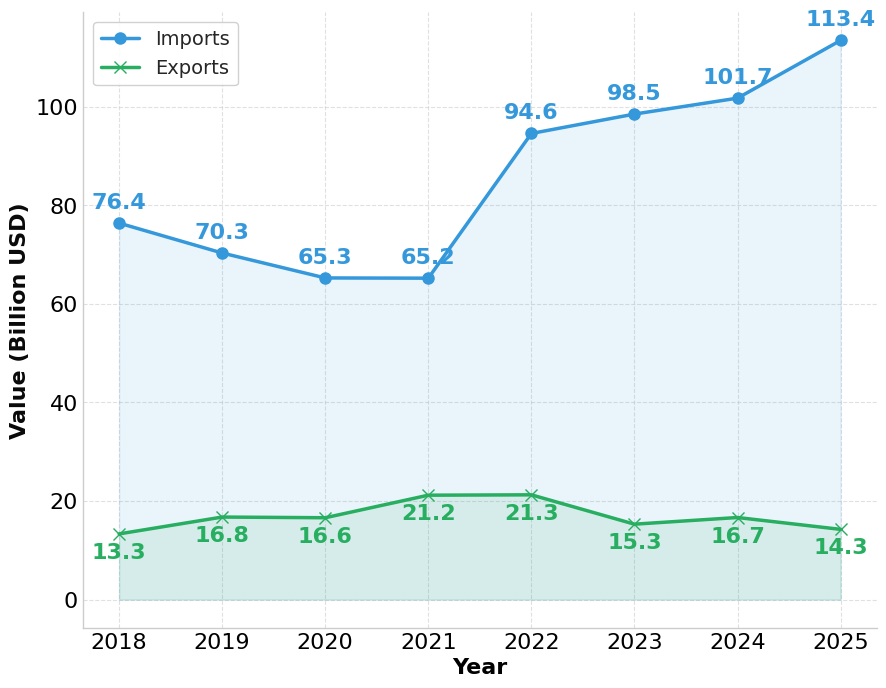

In [14]:
# --- Import and Exports over the Years from 2018-2025---
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df['Year'], df['Imports'], label='Imports', marker='o', markersize=8, color='#3498db', linewidth=2.5)
ax.fill_between(df['Year'], df['Imports'], color='#3498db', alpha=0.1)
ax.plot(df['Year'], df['Exports'], label='Exports', marker='x', markersize=8, color='#27ae60', linewidth=2.5)
ax.fill_between(df['Year'], df['Exports'], color='#27ae60', alpha=0.1)
for i, txt in enumerate(df['Imports']):
    ax.text(df['Year'][i], df['Imports'][i] + 3, f'{txt:.1f}', fontsize=16, ha='center', color='#3498db', fontweight='bold')
for i, txt in enumerate(df['Exports']):
    ax.text(df['Year'][i], df['Exports'][i] - 5, f'{txt:.1f}', fontsize=16, ha='center', color='#27ae60', fontweight='bold')
apply_plot_style(ax, 'Imports vs. Exports (2018-2025)', 'Year', 'Value (Billion USD)')
plt.tight_layout()
plt.savefig('images/ImportsExports.png', dpi=1200)
plt.show()

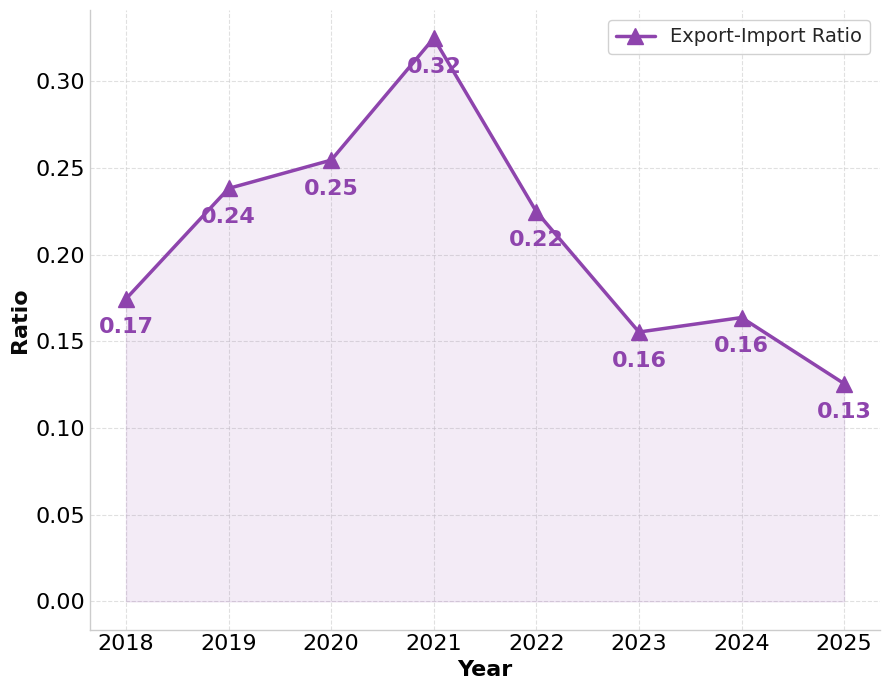

In [15]:
# --- Export Import Ration  ---
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df['Year'], df['Export_Import_Ratio'], label='Export-Import Ratio', marker='^', markersize=12, color='#8e44ad', linewidth=2.5)
ax.fill_between(df['Year'], df['Export_Import_Ratio'], color='#8e44ad', alpha=0.1)
for i, txt in enumerate(df['Export_Import_Ratio']):
    ax.text(df['Year'][i], df['Export_Import_Ratio'][i] - 0.020, f'{txt:.2f}', fontsize=16, ha='center', color='#8e44ad', fontweight='bold')
apply_plot_style(ax, 'Export-Import Ratio (2018-2025)', 'Year', 'Ratio')
plt.tight_layout()
plt.savefig('images/ExportImportRatio.png', dpi=1200)
plt.show()


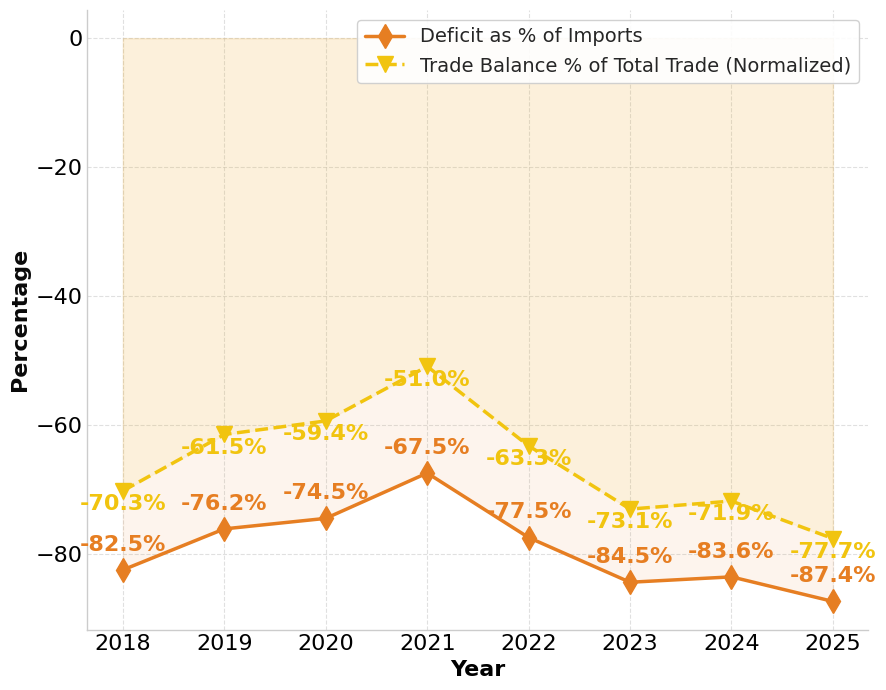

In [16]:
# --- Relative Imbalance ---
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df['Year'], df['Deficit_as_Percent_of_Imports'], label='Deficit as % of Imports', marker='d', markersize=12, color='#e67e22', linewidth=2.5)
ax.fill_between(df['Year'], df['Deficit_as_Percent_of_Imports'], color='#e67e22', alpha=0.08)
ax.plot(df['Year'], df['Trade_Balance_vs_Total_Trade'], label='Trade Balance % of Total Trade (Normalized)', marker='v', markersize=12, color='#f1c40f', linestyle='--', linewidth=2.5)
ax.fill_between(df['Year'], df['Trade_Balance_vs_Total_Trade'], color='#f1c40f', alpha=0.08)
for i, txt in enumerate(df['Deficit_as_Percent_of_Imports']):
    ax.text(df['Year'][i], df['Deficit_as_Percent_of_Imports'][i] + 3, f'{txt:.1f}%', fontsize=16, ha='center', color='#e67e22', fontweight='bold')
for i, txt in enumerate(df['Trade_Balance_vs_Total_Trade']):
    ax.text(df['Year'][i], df['Trade_Balance_vs_Total_Trade'][i] - 3, f'{txt:.1f}%', fontsize=16, ha='center', color='#f1c40f', fontweight='bold')
apply_plot_style(ax, 'Relative Imbalance (2018-2025)', 'Year', 'Percentage')
plt.tight_layout()
plt.savefig('images/ImportsExportsRelativeImbalance.png', dpi=1200)
plt.show()
